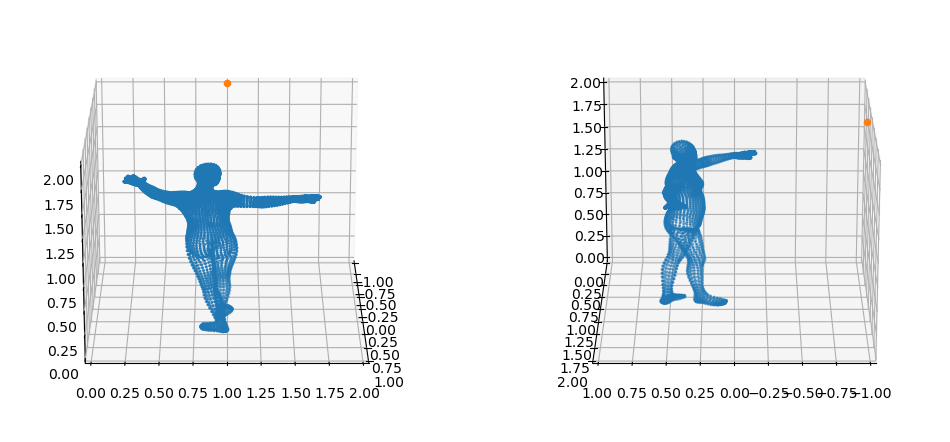

In [1]:
%matplotlib inline
import sys

sys.path.insert(0, ".")
sys.path.insert(0, "./../")

# from trimesh.exchange.obj import load_obj
import trimesh
import cv2
import numpy as np
from nara.camera import Camera
from nara.vis import Plot
from os import getcwd
from os.path import join, isfile, isdir
import matplotlib.pylab as plt

from nara.rasterizing import rasterizing, shading
from nara.light import Light, Material, LightType

data_path = join(getcwd(), "../data")

uv_fpath = join(data_path, "uv_table.npy")
# extri_fpath = join(getcwd(), "data/extri.yml")
# intri_fpath = join(getcwd(), "data/intri.yml")
# mesh_fpath = join(getcwd(), "data/000000.obj")
extri_fpath = join(data_path, "easymocap/extri_10.yml")
intri_fpath = join(data_path, "easymocap/intri_10.yml")
mesh_fpath = join(data_path, "easymocap/000074.obj")
im = join(data_path, "easymocap/cam10.jpg")


intri_param = cv2.FileStorage(intri_fpath, flags=0)
extri_param = cv2.FileStorage(extri_fpath, flags=0)
im = cv2.cvtColor(cv2.imread(im), cv2.COLOR_BGR2RGB)

camera = 12

w = 1024
h = 1024
K = intri_param.getNode(f"K_{camera}").mat()
dist = intri_param.getNode(f"dist_{camera}").mat()
rvec = extri_param.getNode(f"R_{camera}").mat()  # 3x1 np.array
tvec = extri_param.getNode(f"T_{camera}").mat()  # 3x1 np.array

# zbuffer, uv_image, normal_image = rasterizing(V, F, T, cam, calculate_normals=True)

cam = Camera(rvec, tvec, K, dist, w, h)

light1 = Light(light_type=LightType.POINT, intensity=1.0, location=[-1, 1, 2])


mesh = trimesh.load(mesh_fpath)
V = mesh.vertices
F = mesh.faces
T = np.load(uv_fpath)

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(121, projection="3d")
ax.view_init(20, 0)
ax.scatter(V[:, 0], V[:, 1], V[:, 2], s=1)
ax.set_xlim([-1, 1])
ax.set_ylim([0, 2])
ax.set_zlim([0, 2])
light1.plot(ax)
# - - -

ax = fig.add_subplot(122, projection="3d")
ax.view_init(20, 90)
ax.scatter(V[:, 0], V[:, 1], V[:, 2], s=1)
ax.set_xlim([-1, 1])
ax.set_ylim([0, 2])
ax.set_zlim([0, 2])
light1.plot(ax)
# - - -

plt.show()

V2light_vector (1, 6886, 3)
shadow_img (1024, 1024) 0.0 1.0996457676802474


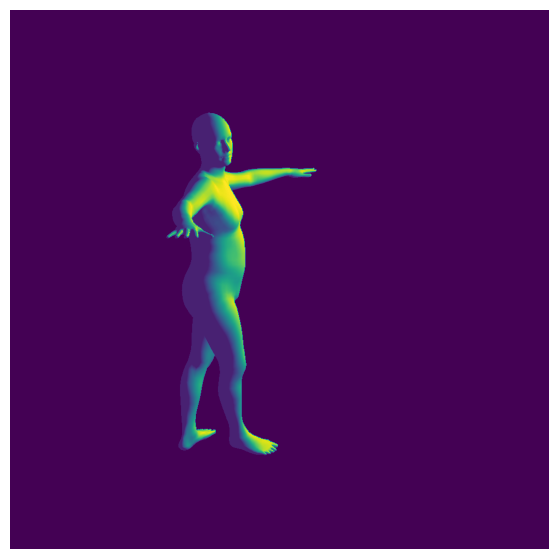

In [6]:
material = Material(
    specular_reflection_constant=0,
    diffuse_reflection_constant=1.0,
    ambient_reflection_constant=0.1,
    shininess=0.
)

shadow_img = shading(V, F, cam, [light1], material, ambinent_light=1.0)
print("shadow_img", shadow_img.shape, np.min(shadow_img), np.max(shadow_img))


fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111)
ax.imshow(shadow_img)
ax.axis('off')
plt.show()